# ADA Boosting - Data and Model

Pentru partea de Ada Boosting o să avem un proiect în care scopul principal al acestuia nu este calitatea modelului de predicție, ci o să avem două scopuri mari pentru un astfel de proiect. O să lucrăm cu un set de date despre ciuperci, set de date care are o mulțime de features de tip categorical. Setul de date are un label care ne spune și dacă acel tip de ciupercă este otrăvitoare sau dacă se poate consuma ca și aliment. În mod normal un model de clasificare ar fi util pentru ca atunci când oferim toate informațiile despre o anumită specie de ciupercă să ne spună dacă este otrăvitoare sau nu. Poate de cele mai multe ori nu avem toate datele, iar din acesată cauză ar fi frumos să avem un set de noține importante care să ne poată avertiza din prima dacă o ciupercă este otrăvitoare sau nu

Modelele de Machine Learning de tipul Decison Tree au capacitatea de a reporta înapoi acel feature_importance, iar partea de Ada Boosting utilizând weak learners se concentrează pe un singur features deodată care ar putea fi potrivit pentru partea aceea de notițe. O să începem să ne uităm peste setul de date cu care o să lucrăm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/DATA/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Putem să vedem din setul de date de mai sus că aceste coloane sunt categorice, prin urmare nu putem să utilizăm concepte de coloane continue, cum ar fi deviația standard sau media acelor valori. Putem să ne legăm doar de numărul de valori unice din fiecare clasă, sau de numărul de valori dintr-o clasă care au label diferit și să facem o comparație între acele valori.

<AxesSubplot:xlabel='class', ylabel='count'>

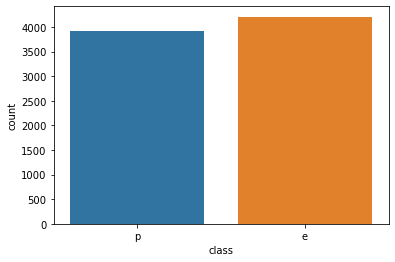

In [5]:
sns.countplot(data=df, x='class')

Deși avem un set cu coloane categorice, putem să utilizăm comanda de describe(), iar aceasta o să ne afișeze anumite date de care putem să ne folosim pentru a exploata acest set de date

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


Coloana de count ne spune câte elemente sunt în acea coloană, cea de unique ne arată numărul de valori unice din coloana respectivă, iar coloana de top ne indică valoarea care apare de cele mai multe ori în cadrul acelei coloane.

Următorul pas este să ne separăm features de label și să împărțim setul de date în train set și test set.

In [15]:
X = df.drop('class', axis=1)
y = df['class']

In [16]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


Mai sus putem să vedem că aceste Feature sunt coloane categorice care au ca și valori string-uri, iar din cele învățate știm că un model de DecisionTree nu se descurcă cu astfel de date, prin urmare trebuie să creem dummy variables pentru aceste date.

In [17]:
X = pd.get_dummies(X, drop_first=True)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

Urmează să ne importăm și să creem un model de Ada Boosting. Modelul îl găsim în secțiunea de sklearn.ensemble din moment ce este un ansamblu de modele

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting is requi

Ca și hyperparametrii principali pentru acest acest boosting avem partea de 'base_estimator' care este setată default cu None. Dacă se păstrează None atunci estimatorul o să fie setat la un model de DecisionTree cu max_depth=1, adică un weak learner. Un alt hyperparametru este cel de 'n_estimators' prin care putem să setăm numărul de estimatori care să fie construiți. O să creem un model cu un estimator default și cu un singur estimator

In [22]:
ada_boost = AdaBoostClassifier(n_estimators=1)

In [23]:
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

După ce am antrenat modelul putem să fcem predicții și să verificăm calitatea acestui model.

In [28]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [25]:
y_pred = ada_boost.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


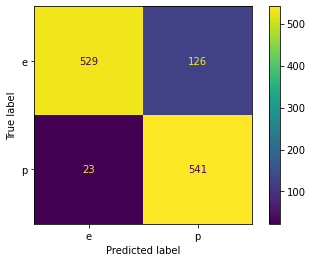

In [27]:
plot_confusion_matrix(ada_boost, X_test, y_test)

Din rezultatele de mai sus și din acest plot putem să zicem că modelul respectiv, deși are un singur DecisionTree, cel mai simplu cu un singur Node și două Leaf Nodes are o performanță relativ nu rea, ținând cont că acesta a luat o singură coloană din multitudinea de coloane care există în setul de date după ce am creat și acele dummy variables

In [29]:
ada_boost.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Din acest array care reprezintă features importances vedem faptul că o singură coloană are valoarea 1, restul au 0, prin urmare o singură coloană a fost luată în calcul în momentul creeri acestui model de DecisionTree. Putem să extragem index-ul pe care se găsește acea valoare de 1 utilizând argmax și să preluăm coloana respectivă din features pentru a vedea care este coloana respectivă.

In [30]:
ada_boost.feature_importances_.argmax()

22

Coloana respectivă se găsește pe index-ul cu numărul 22. Să vedem care este acea coloană.

In [31]:
X.columns[22]

'odor_n'

Coloana respectivă ne spune dacă acea ciupercă are sau nu un miros. Prin urmare, cel mai bun mod de a ne da seama dacă o ciupercă este otrăvitoare sau nu este să verificăm dacă are sau nu miros. Un astfel de model am văzut că are o precizie de peste 80% în a face această diferență. Aceasta poate fi una dintre primele notițe pe care putem să le extragem, să verificăm mirosul ciupercii.

<AxesSubplot:xlabel='odor', ylabel='count'>

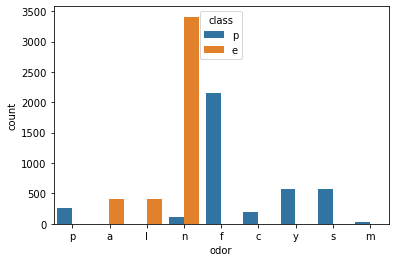

In [33]:
sns.countplot(data=df, x='odor', hue='class')

Din plot-ul de mai sus putem să vedem că majoritatea ciupercilor care nu au un miros (ceea ce reprezintă n la odor) sunt ciuperci comestibile.

In [34]:
len(X.columns)

95

În cadrul acestui model avem un număr de 95 de features pe care putem să le verificăm Prin urmare putem să creem modele de AdaBoost în care numărul de estimatori să fie de la 1 la 95 și să calculăm eroarea pentru fiecare dintre aceste modele.

In [35]:
err_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    err = 1 - accuracy_score(y_test, y_pred)

    err_rates.append(err)

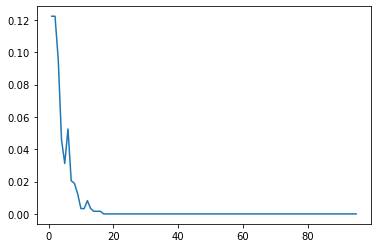

In [36]:
plt.plot(range(1, 96), err_rates)

Din plotul de mai sus se poate observa faptul că eroarea începe să scadă cu cât avem mai mulți estimatori, iar de la un moment dat eroarea se stabilește. Între 20 și 95 de estimatori valoarea erorii pare să fie aceeași, prin urmare sunt destui 20 de estimatori pentru model pentru aceste date.

In [37]:
model

AdaBoostClassifier(n_estimators=95)

Variabila de mai sus conține ultimul model care a fost rulat din acel for loop, modelul care are valoarea 95 pentru n_estimators (valoare care este prea mare pentru un astfel de model). Totuși pentru acest model o să extragem valorile pentru features_importances și o să le introducem într-un data frame pentru a le vizualiza

In [38]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [39]:
feature_imp = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])

In [40]:
feature_imp

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [41]:
feature_imp = feature_imp[feature_imp['Importance'] > 0 ]

In [42]:
feature_imp

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


Deoarece avem un număr de 95 de features, nu toate dintre acestea contează pentru model, de aceea au existat un număr așa de mare care au valoarea 0, iar ceea ce am făcut mai sus a fost să extragem valorile care sunt mai mari de 0. Cu datele pe care le avem putem să creem un barplot() prin care să vedem importanța fiecărui feature

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'cap-color_c'),
  Text(1, 0, 'cap-color_n'),
  Text(2, 0, 'cap-color_w'),
  Text(3, 0, 'bruises_t'),
  Text(4, 0, 'odor_c'),
  Text(5, 0, 'odor_f'),
  Text(6, 0, 'odor_n'),
  Text(7, 0, 'odor_p'),
  Text(8, 0, 'gill-spacing_w'),
  Text(9, 0, 'gill-size_n'),
  Text(10, 0, 'stalk-shape_t'),
  Text(11, 0, 'stalk-root_b'),
  Text(12, 0, 'stalk-surface-above-ring_k'),
  Text(13, 0, 'stalk-surface-below-ring_y'),
  Text(14, 0, 'stalk-color-below-ring_n'),
  Text(15, 0, 'stalk-color-below-ring_w'),
  Text(16, 0, 'ring-number_t'),
  Text(17, 0, 'spore-print-color_r'),
  Text(18, 0, 'spore-print-color_w'),
  Text(19, 0, 'population_c'),
  Text(20, 0, 'population_v'),
  Text(21, 0, 'habitat_w')])

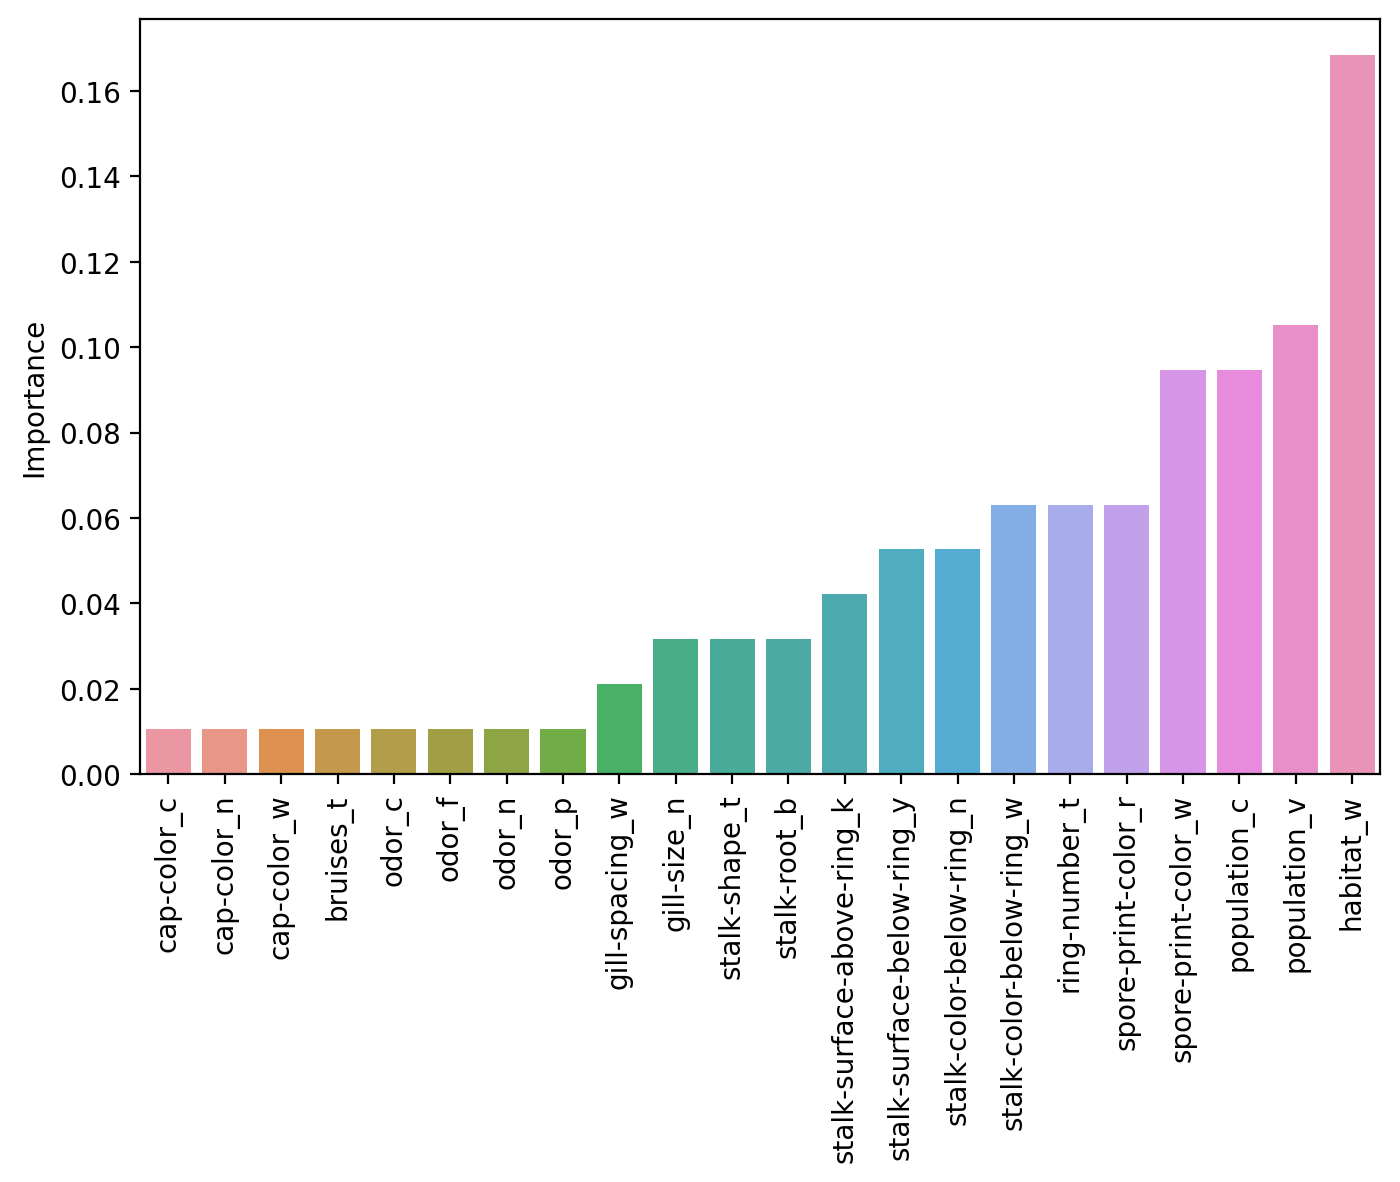

In [46]:
plt.figure(figsize=(8, 5), dpi=200)
sns.barplot(x=feature_imp.index, y='Importance', data=feature_imp.sort_values('Importance'))
plt.xticks(rotation=90)

Din graficul de mai sus putem vedea faptul că acel feature de odor_n, care reprezenta dacă o ciupercă are un anumit miros sau nu, acuma nu mai este atâta de important. Asta se poate întâmpla și din cauza faptului că avem un număr atâta de mare de estimatori.

## Recapitulare

În cadrul acestei secțiuni am învățat următoarele lucruri:

    1. De unde să importăm un model de AdaBoostClassifier

        from sklearn.ensemble import AdaBoostClassifier

    2. Cum să creem un model de AdaBoostClassifier

        ada_model = AdaBoostClassifier()

    3. Care sunt hyperparametrii cei mai importanți pentru modelul respectiv

        base_estimator = reprezintă estimatorul pentru care să utilizăm conceptul ce adaptive boosting (setat default la DecisionTree)

        m_estimators = câți weak learners să creeze acest model

    4. Cum să extragem index-ul pe care se găsește valoarea cea mai mare din feature_importances_

        model.feature_importances_.argmax()

    5. Un astfel de model se poate utiliza și pentru a oferi persoanelor anumite informații generale despre unele date. De exemplu, un DecisionTree cu max_depth=1 pentru acest set de date ne spune că de obicei cipuercile care au un anumit miros nu sunt comestibile (asta în sens general). Putem utiliza un AdaBoostClassifier și pentru a extrage astfel de informații.